In [ ]:
#from keras.utils import normalize
import tensorflow as tf
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#Resizing images, if needed
SIZE_X = 256
SIZE_Y = 256
n_classes= 3 #Number of classes for segmentation
num_images = 632 #Total 1600 available

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
channel_1_image_names = glob.glob("/content/drive/MyDrive/Dataset/Channel_1_clips/*.tif")
channel_1_image_names.sort()
channel_1_image_names_subset = channel_1_image_names[0:num_images]
channel_1_images = [cv2.imread(image, 0) for image in channel_1_image_names_subset]
channel_1_image_dataset = np.array(channel_1_images)
channel_1_image_dataset = np.expand_dims(channel_1_image_dataset, axis = 3)

In [ ]:
channel_2_image_names = glob.glob("/content/drive/MyDrive/Dataset/Channel_2_clips/*.tif")
channel_2_image_names.sort()
channel_2_image_names_subset = channel_2_image_names[0:num_images]
channel_2_images = [cv2.imread(image, 0) for image in channel_2_image_names_subset]
channel_2_image_dataset = np.array(channel_2_images)
channel_2_image_dataset = np.expand_dims(channel_2_image_dataset, axis = 3)

In [ ]:
channel_3_image_names = glob.glob("/content/drive/MyDrive/Dataset/Channel_3_clips/*.tif")
channel_3_image_names.sort()
channel_3_image_names_subset = channel_3_image_names[0:num_images]
channel_3_images = [cv2.imread(image, 0) for image in channel_3_image_names_subset]
channel_3_image_dataset = np.array(channel_3_images)
channel_3_image_dataset = np.expand_dims(channel_3_image_dataset, axis = 3)

In [ ]:
channel_4_image_names = glob.glob("/content/drive/MyDrive/Dataset/Channel_4_clips/*.tif")
channel_4_image_names.sort()
channel_4_image_names_subset = channel_4_image_names[0:num_images]
channel_4_images = [cv2.imread(image, 0) for image in channel_4_image_names_subset]
channel_4_image_dataset = np.array(channel_4_images)
channel_4_image_dataset = np.expand_dims(channel_4_image_dataset, axis = 3)

In [ ]:
channel_5_image_names = glob.glob("/content/drive/MyDrive/Dataset/Channel_5_clips/*.tif")
channel_5_image_names.sort()
channel_5_image_names_subset = channel_5_image_names[0:num_images]
channel_5_images = [cv2.imread(image, 0) for image in channel_5_image_names_subset]
channel_5_image_dataset = np.array(channel_5_images)
channel_5_image_dataset = np.expand_dims(channel_5_image_dataset, axis = 3)

In [ ]:
channel_7_image_names = glob.glob("/content/drive/MyDrive/Dataset/Channel_7_clips/*.tif")
channel_7_image_names.sort()
channel_7_image_names_subset = channel_7_image_names[0:num_images]
channel_7_images = [cv2.imread(image, 0) for image in channel_7_image_names_subset]
channel_7_image_dataset = np.array(channel_7_images)
channel_7_image_dataset = np.expand_dims(channel_7_image_dataset, axis = 3)

In [ ]:
C1C2 = np.concatenate((channel_1_image_dataset,channel_2_image_dataset),axis=3)
C1C2C3 = np.concatenate((C1C2,channel_3_image_dataset),axis=3)
C1C2C3C4 = np.concatenate((C1C2C3,channel_4_image_dataset),axis=3)
C1C2C3C4C5 = np.concatenate((C1C2C3C4,channel_5_image_dataset),axis=3)
C1C2C3C4C5C7 = np.concatenate((C1C2C3C4C5,channel_7_image_dataset),axis=3)

In [ ]:
mask_names = glob.glob("/content/drive/MyDrive/Dataset/Cloud_mask_clips/*.tif")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)

In [ ]:
print("Image data shape is: ", C1C2C3C4C5C7.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", C1C2C3C4C5C7.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (632, 256, 256, 6)
Mask data shape is:  (632, 256, 256)
Max pixel value in image is:  255
Labels in the mask are :  [128 191 255]


In [ ]:
#Encode labels to 0, 1, 2, 3, ... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask_dataset.shape  
mask_dataset_reshaped = mask_dataset.reshape(-1,1)
mask_dataset_reshaped_encoded = labelencoder.fit_transform(mask_dataset_reshaped)
mask_dataset_encoded = mask_dataset_reshaped_encoded.reshape(n, h, w)

np.unique(mask_dataset_encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2])

In [ ]:
mask_dataset_encoded = np.expand_dims(mask_dataset_encoded, axis = 3)
print(mask_dataset_encoded.shape)

(632, 256, 256, 1)


In [ ]:
#Normalize images
C1C2C3C4C5C7 = C1C2C3C4C5C7 /255.  #Can also normalize or scale using MinMax scaler

In [ ]:
#Split training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(C1C2C3C4C5C7, mask_dataset_encoded, test_size = 0.2, random_state = 42)

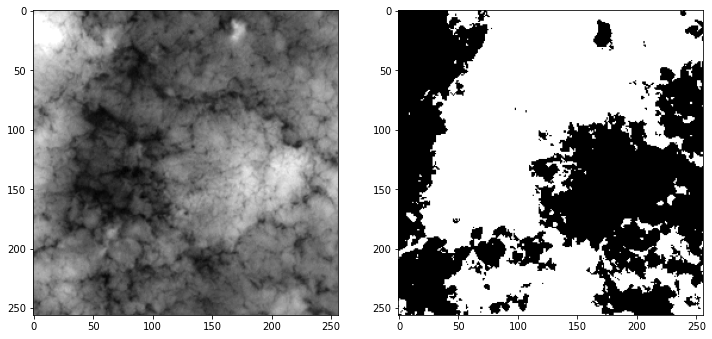

In [ ]:
import random
image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

In [ ]:
print(y_train_cat.shape)

(505, 256, 256, 3)


In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
model = build_unet(input_shape, n_classes=3)#
#run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

softmax
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 6  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  3520        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

In [ ]:
history = model.fit(X_train, y_train_cat, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(X_test, y_test_cat), 
                    shuffle=False)

Epoch 1/100
32/32 [==============================] - 64s 1s/step - loss: 0.4579 - accuracy: 0.7870 - val_loss: 42.2302 - val_accuracy: 0.5424
Epoch 2/100
32/32 [==============================] - 27s 853ms/step - loss: 0.3555 - accuracy: 0.8380 - val_loss: 2.1156 - val_accuracy: 0.2557
Epoch 3/100
32/32 [==============================] - 28s 871ms/step - loss: 0.3281 - accuracy: 0.8518 - val_loss: 0.5721 - val_accuracy: 0.8435
Epoch 4/100
32/32 [==============================] - 28s 888ms/step - loss: 0.3121 - accuracy: 0.8585 - val_loss: 0.6218 - val_accuracy: 0.6746
Epoch 5/100
32/32 [==============================] - 29s 899ms/step - loss: 0.3037 - accuracy: 0.8611 - val_loss: 2.8424 - val_accuracy: 0.5885
Epoch 6/100
32/32 [==============================] - 29s 910ms/step - loss: 0.2912 - accuracy: 0.8694 - val_loss: 0.8401 - val_accuracy: 0.6149
Epoch 7/100
32/32 [==============================] - 30s 929ms/step - loss: 0.2838 - accuracy: 0.8704 - val_loss: 0.4060 - val_accuracy: 0

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred.shape

(454, 128, 128, 3)

In [ ]:
y_pred_argmax=np.argmax(y_pred, axis=3)
y_pred_argmax.shape

(454, 128, 128)

In [ ]:
#Using built in keras function
from keras.metrics import Accuracy
n_classes = 3
accuracy_keras = Accuracy()  
accuracy_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean accuracy =", accuracy_keras.result().numpy())

Mean accuracy = 0.81133264


332


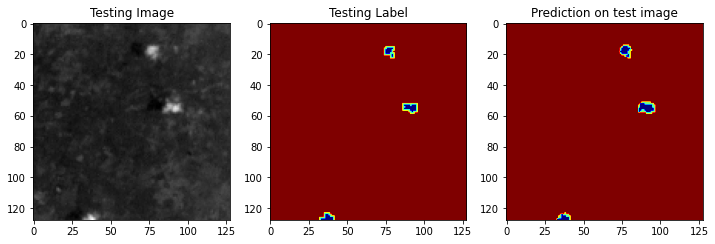

In [ ]:
#Predict on a few images
#model = get_model()
#model.load_weights('???.hdf5')  
import random
test_img_number = random.randint(0, len(X_test)-1)
print(test_img_number)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()